In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Load the Data
df = pd.read_csv('weather.csv')

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or you can fill them based on your analysis)
df = df.dropna()

# Check for duplicates
df = df.drop_duplicates()

# Optionally, you can handle outliers if necessary

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [ ]:
# Step 1: Load and Inspect the Data
df = pd.read_csv('weather.csv')
print(df.head())
print(df.info())
print(df.describe())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [ ]:
# Step 2: Handle Missing Values
# Drop rows with any missing values (could also use imputation for larger datasets)
df_cleaned = df.dropna()
df_cleaned.columns



Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

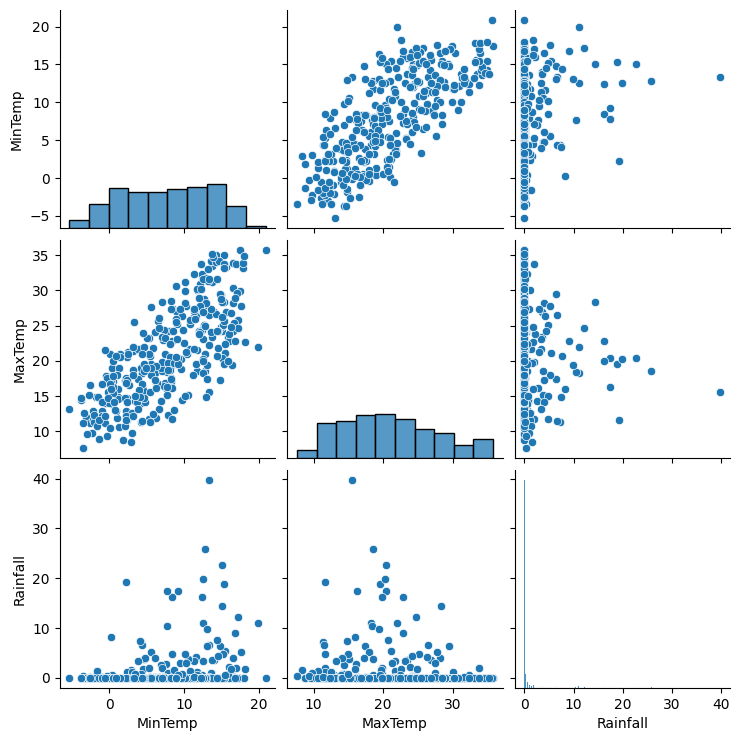

In [ ]:
# Step 3: Data Visualization
# Visualize relationships among MinTemp, MaxTemp, and Rainfall
sns.pairplot(df_cleaned[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()



In [ ]:
# Step 4: Feature Engineering
# If a Date column exists, convert it and create a Month feature
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
    df_cleaned['Month'] = df_cleaned['Date'].dt.month


In [ ]:
# Calculate average MaxTemp by month if Month feature is available
if 'Month' in df_cleaned.columns:
    monthly_avg_max_temp = df_cleaned.groupby('Month')['MaxTemp'].mean()

    # Data Visualization (Monthly Average Max Temperature)
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Max Temperature')
    plt.title('Monthly Average Max Temperature')
    plt.grid(True)
    plt.show()


In [ ]:
# Step 5: Prepare Data for Modeling
# Predict Rainfall based on MinTemp and MaxTemp
X = df_cleaned[['MinTemp', 'MaxTemp']]
y = df_cleaned['Rainfall']


In [ ]:
# Standardize the features to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Step 7: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Step 8: Make Predictions and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse:.2f}')

Mean Squared Error for Rainfall Prediction: 31.64


In [ ]:

# Step 9: Analysis on Rainfall by Month (if Month is available)
if 'Month' in df_cleaned.columns:
    monthly_avg_rainfall = df_cleaned.groupby('Month')['Rainfall'].mean()
    highest_rainfall_month = monthly_avg_rainfall.idxmax()
    lowest_rainfall_month = monthly_avg_rainfall.idxmin()
    print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')